In [103]:
import pandas as pd


In [104]:
df = pd.read_csv('/home/dldx/xxy/Ads_effectiveness/data/ads_2.csv')

## part1: Statistics of factors about each sub_category

In [105]:
# 统计每一列的有效值
count = []

for column in range(11,73):
    temp = 0
    for index in range(len(df)):
        if df.iloc[index, column] != 0:
            temp = temp+1
    count.append(temp)

dic = {}
for i in range(11,73):
    dic[df.columns[i]] = count[i-11]

dic = dict(sorted(dic.items(), key=lambda x:x[1], reverse=False))
dic



{'Female.Celebrity': 36,
 'Cat': 38,
 'Animated': 38,
 'Non-Amazon.Brands': 38,
 'Disability.Representation': 39,
 'Male.Celebrity': 40,
 'Amazon.Vans': 47,
 'Awe': 48,
 'Shipping.Benefit': 49,
 'Dog': 52,
 'Amaon.Devices': 53,
 'Prominent.Amazon.Logo': 54,
 'Prominent.Animal': 55,
 'Price.Information': 55,
 'Amazon.Website': 56,
 'Amazon.Box.Opening': 56,
 'Sadness': 61,
 'Amazon.Saves.the.Day': 65,
 'Teen': 66,
 'Dancing': 67,
 'Call.to.Action': 67,
 'Jingle.Appearance': 69,
 'Transformation': 70,
 'Dialogue': 71,
 'Pop.Culture.Music': 72,
 'Mastery': 73,
 'Animal': 77,
 'Elderly': 79,
 'Female.Voiceover': 83,
 'Amazon.Employee': 83,
 'Autonomy': 83,
 'Parent-Child.Interation': 85,
 'Amazon.Search.Bar': 88,
 'Selection.Benefit': 88,
 'Amazon.Brands': 97,
 'Amazon.App': 97,
 'Humor': 100,
 'Start.card': 103,
 'Meaning': 104,
 'Child': 109,
 'Disadvantaged': 111,
 'Mix': 113,
 'High-arousal.Happiness': 116,
 'Multiple.Ethnicities': 121,
 'Male.Voiceover': 131,
 'Belonging': 134,
 'Amaz

In [106]:
color_dic = {}
for i in range(11,73):
    if i < 31:
        color_dic[df.columns[i]] = "#FFF2CC"
    if i >= 31 and i < 42:
        color_dic[df.columns[i]] = "#FCE4D6"
    if i >= 42 and i < 57:
        color_dic[df.columns[i]] = "#C4D4E2"
    if i >= 57 and i < 63:
        color_dic[df.columns[i]] = "#92D050"
    if i >= 63 :
        color_dic[df.columns[i]] = "#D3B5E9"
    
color = []
for i in dic.keys():
    color.append(color_dic[i])
color

['#FFF2CC',
 '#FFF2CC',
 '#FCE4D6',
 '#C4D4E2',
 '#FFF2CC',
 '#FFF2CC',
 '#C4D4E2',
 '#D3B5E9',
 '#92D050',
 '#FFF2CC',
 '#C4D4E2',
 '#C4D4E2',
 '#FFF2CC',
 '#92D050',
 '#C4D4E2',
 '#C4D4E2',
 '#FCE4D6',
 '#92D050',
 '#FFF2CC',
 '#FCE4D6',
 '#92D050',
 '#FCE4D6',
 '#D3B5E9',
 '#FCE4D6',
 '#FCE4D6',
 '#D3B5E9',
 '#FFF2CC',
 '#FFF2CC',
 '#FFF2CC',
 '#C4D4E2',
 '#D3B5E9',
 '#FCE4D6',
 '#C4D4E2',
 '#92D050',
 '#C4D4E2',
 '#C4D4E2',
 '#FCE4D6',
 '#C4D4E2',
 '#D3B5E9',
 '#FFF2CC',
 '#D3B5E9',
 '#D3B5E9',
 '#FCE4D6',
 '#FFF2CC',
 '#FFF2CC',
 '#D3B5E9',
 '#C4D4E2',
 '#92D050',
 '#D3B5E9',
 '#FFF2CC',
 '#FFF2CC',
 '#FFF2CC',
 '#FCE4D6',
 '#FFF2CC',
 '#FFF2CC',
 '#FFF2CC',
 '#C4D4E2',
 '#C4D4E2',
 '#D3B5E9',
 '#FCE4D6',
 '#FFF2CC',
 '#C4D4E2']

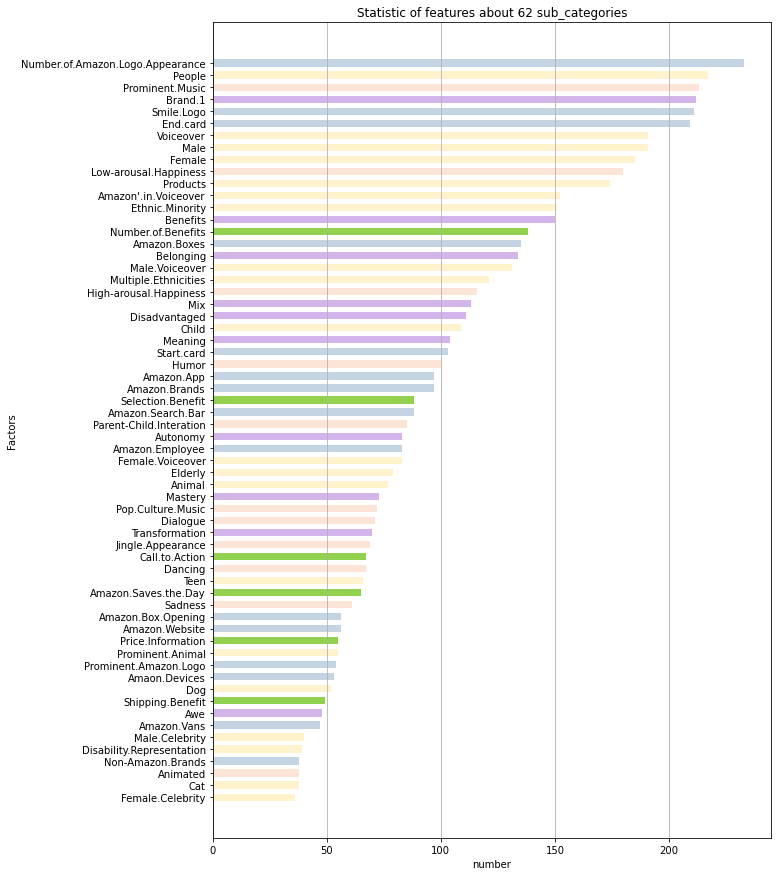

In [107]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(list(dic.keys()))
y = np.array(list(dic.values()))
plt.subplots(figsize=(10, 15))
plt.title("Statistic of features about 62 sub_categories")
plt.ylabel("Factors")
plt.xlabel("number")
plt.grid(axis='x')
plt.barh(x,y,height=0.6, color = color)
plt.savefig("./plots/statistic_sub_gategory.png")

plt.show()

## part2: Statistics of factors about five categories

In [108]:
Casting, Setting, Brand_cues, Messaging, Other = 0,0,0,0,0
for i in range(11,73):
    if i < 31:
        Casting = Casting + dic[df.columns[i]]
    if i >= 31 and i < 42:
        Setting = Setting + dic[df.columns[i]]
    if i >= 42 and i < 57:
        Brand_cues = Brand_cues + dic[df.columns[i]]
    if i >= 57 and i < 63:
        Messaging = Messaging + dic[df.columns[i]]
    if i >= 63 :
        Other = Other + dic[df.columns[i]]
category_dic = {"Casting": Casting, "Setting": Setting, "Brand_cues": Brand_cues, "Messaging": Messaging, "Other": Other}
category_dic = dict(sorted(category_dic.items(), key=lambda x:x[1], reverse=True))
category_dic

{'Casting': 2187,
 'Brand_cues': 1560,
 'Other': 1098,
 'Setting': 1072,
 'Messaging': 462}

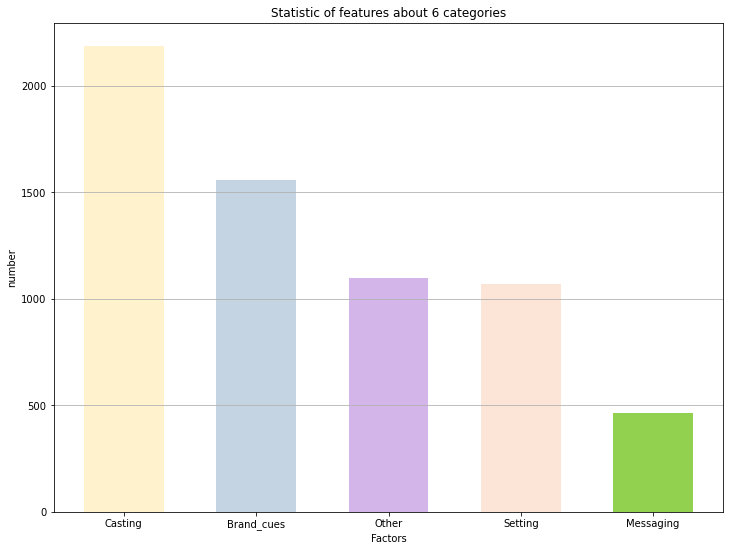

In [109]:
x = np.array(list(category_dic.keys()))
y = np.array(list(category_dic.values()))
plt.subplots(figsize=(12, 9))
plt.title("Statistic of features about 6 categories")
plt.xlabel("Factors")
plt.ylabel("number")
plt.grid(axis='y')
plt.bar(x,y,width=0.6, color = ["#FFF2CC", "#C4D4E2", "#D3B5E9", "#FCE4D6", "#92D050"])
plt.savefig("./plots/statistic_gategory.png")
plt.show()

## part3: Correlations between factors